# Chapter 5 - Companies House dataset

The following key is used throughout this notebook:
- **Bold** text is the input entered to ChatGPT
- *Italic* text is my thoughts, decision making
- Regular text is the output from ChatGPT

After visualizations I have generally tried to include thoughts and comments on:
- Calculated correlation
- Explanation of correlation
- Further data collection / analysis
- Recommendations

There were a very limited number of data points for several columns, so this should be kept in mind throughout the script when reading results.

In [50]:
import numpy as np
import pandas as pd

In [82]:
# Importing the dataset that was cleaned in chapter 4
file_path = 'H:\Documents\Software Development\QUB Software Development\Data_analysis_module\Datasets\Chapter 4 datasets\companies_house_cleaned.csv'
df = pd.read_csv(file_path)

In [83]:
# Checking the size of the dataset (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)
df.shape

(30, 9)

In [64]:
# Checking the columns of the dataset (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)
df.columns

Index(['Company Name', 'Incorporated on', 'Company Age', 'No. Officers',
       'No. Employees', 'Current Year', 'Equity', 'Fixed Assets',
       'Current Assets'],
      dtype='object')

In [65]:
# Checking the types (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
df.dtypes

Company Name        object
Incorporated on     object
Company Age          int64
No. Officers         int64
No. Employees      float64
Current Year         int64
Equity               int64
Fixed Assets       float64
Current Assets     float64
dtype: object

In [55]:
df.head()

,Company Name,Incorporated on,Company Age,No. Officers,No. Employees,Current Year,Equity,Fixed Assets,Current Assets
0,1TO1MUSIC LTD,21/03/2013,10,1,5.0,2020,2759,3234.0,81658.0
1,1TO1MUSIC LTD,21/03/2013,10,1,NaN,2019,1809,3805.0,65862.0
2,1TO1MUSIC LTD,21/03/2013,10,1,NaN,2018,1033,6376.0,61243.0
3,ANDANTE PERCUSSION LTD,24/02/2004,19,5,NaN,2021,1,NaN,NaN
4,ANDANTE PERCUSSION LTD,24/02/2004,19,5,NaN,2020,1,NaN,NaN


*I noticed some 1's in the Equity and Current Assets columns which need to be changed to NaN, as they aren't valid figures.*

In [66]:
# Replace all 1's in the Equity column with NaN
df['Equity'] = df['Equity'].replace(1, np.nan)
df['Current Assets'] = df['Current Assets'].replace(1, np.nan)

In [57]:
# Printing a summary of the dataset (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company Name     30 non-null     object 
 1   Incorporated on  30 non-null     object 
 2   Company Age      30 non-null     int64  
 3   No. Officers     30 non-null     int64  
 4   No. Employees    14 non-null     float64
 5   Current Year     30 non-null     int64  
 6   Equity           24 non-null     float64
 7   Fixed Assets     11 non-null     float64
 8   Current Assets   21 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.2+ KB


In [58]:
# Generates descriptive statistics and transposing it using .T (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Company Age,30.0,16.100000,12.259690,3.0,9.0,10.0,18.75,44.0
No. Officers,30.0,3.500000,2.661993,1.0,1.0,3.0,5.00,10.0
No. Employees,14.0,2.571429,2.064882,0.0,1.0,2.0,4.00,6.0
Current Year,30.0,2019.466667,1.074255,2018.0,2019.0,2019.5,2020.00,2021.0
Equity,24.0,20659.750000,29258.752965,895.0,4652.5,7219.0,29139.75,133423.0
Fixed Assets,11.0,17253.636364,21194.310011,3234.0,5714.5,10112.0,17471.50,75755.0
Current Assets,21.0,46913.666667,52613.030656,6778.0,16298.0,29568.0,61243.00,240961.0


## Create a plan with ChatGPT

**You are an expert in EDA (Exploratory Data Analysis) and producing useful visualisations.
I have a dataset that contains financial information about different companies in the musical instrument manufacturing industry. Here are the columns and their descriptions:**

**Incorporated on: The date when the company was incorporated. It appears to in the format DD/MM/YYYY.
Company Age: The age of the company, likely measured in years.
No. Officers: The number of officers in the company, possibly referring to executive or managerial positions.
No. Employees: The number of employees working for the company. There are some missing values in this column.
Current Year: The year for which the financial data is recorded.
Equity: The equity value of the company for the given year. This might be a measure of ownership interest.
Fixed Assets: The value of fixed assets owned by the company, such as land, buildings, and machinery. Some values are missing in this column.
Current Assets: The value of current assets owned by the company, including assets that are likely to be converted into cash within a short period (e.g., accounts receivable, inventory). There are also missing values in this column.**

**Prepare a detailed, step-by-step EDA plan which I can follow which will produce useful insights.**

Certainly! Let's begin by first understanding the structure and initial characteristics of the dataset. Then, we'll break down the Exploratory Data Analysis (EDA) plan into detailed steps.

Step 1: Initial Inspection

Load the Data: Read the dataset from the given CSV file.

Basic Statistics: Generate summary statistics for the numerical columns to understand the central tendencies and dispersion.

Missing Values: Identify the columns with missing values and their percentage.

Data Types: Check the data types of each column to ensure they are consistent with the given descriptions.

Duplicate Rows: Check for any duplicate rows and decide whether they need to be handled.

Step 2: Data Cleaning

Parse Dates: Parse the "Incorporated on" column to a datetime format.

Handle Missing Values: Decide on a strategy for handling missing values in the "No. Employees," "Fixed Assets," and "Current Assets" columns. Options might include imputation, removal, or filling with specific values.

Correct Data Types: Ensure that numerical columns are in proper numerical formats.

Step 3: Univariate Analysis

Histograms and Box Plots: Plot histograms and box plots for numerical variables to understand their distributions.

Bar Charts: Plot bar charts for categorical variables like "Current Year."

Time Series Analysis: Plot the trends of equity, fixed assets, and current assets over the years.

Step 4: Bivariate and Multivariate Analysis

Correlation Matrix: Create a correlation matrix to understand the relationships between numerical variables.

Scatter Plots: Plot scatter plots to visualize relationships between pairs of variables, such as equity and fixed assets.

Age vs. Other Features: Analyze how company age affects other variables like equity, number of officers, and number of employees.

Step 5: Additional Insights

Company Growth Trends: Analyze how different companies have grown in terms of equity, assets, and employees.

Asset Composition: Analyze the ratio of fixed assets to current assets for different companies.

Executive to Employee Ratio: Analyze the ratio of officers to employees for different companies.

Step 6: Summary and Final Visualizations

Create Dashboards: Compile the key insights and visualizations into a dashboard or report.

Summary: Summarize the main findings and conclusions.

Let's start by performing the initial inspection (Step 1) to have a better understanding of the dataset. Shall we?

## Univariate Analysis

*Univariate analysis has been completed in Chapter 4. Various graphs were produced to display the most important columns of data that I want to investigated including:*

 *- Company Age*
 
 *- Year incorporated*
 
 *- Equity*
 
 *- Fixed Assets*
 
 *- Current Assets*
 
 *- Employees*
 
 *- Officers*

## Bivariate Analysis

**Lets start with bivariate analysis**

Certainly! Bivariate analysis focuses on the relationships between two variables at a time. Here's a detailed plan for conducting bivariate analysis on this dataset:

Step 4: Bivariate Analysis

Equity vs. Fixed Assets: Create a scatter plot to visualize the relationship between the equity and fixed assets. This will help in understanding how ownership interest is related to fixed assets like land and machinery.

Equity vs. Current Assets: Analyze the relationship between equity and current assets through scatter plots. This may highlight the short-term financial position of the company.

Company Age vs. Equity: Plot the relationship between company age and equity to see if older companies tend to have higher equity.

Number of Officers vs. Number of Employees: Analyze the relationship between the number of officers and employees, which might indicate the management structure.

Fixed Assets vs. Current Assets: Compare the fixed assets to current assets to understand the asset composition in different companies.

Year-wise Trends for Two Variables: Choose pairs of variables and plot them against the "Current Year" to understand how two variables have moved together over time.

Compare Missing Values: If there are pairs of columns with missing values, analyze if there's a pattern in how they are missing together.

Categorical vs. Continuous Relationships: If there are any categorical variables, analyze how they relate to continuous variables, such as comparing equity across different years.

Regression Analysis: For pairs of variables that seem to have a linear relationship, fit a simple linear regression model to quantify the relationship.

The idea here is to compare every meaningful pair of variables to understand how they interact with each other. It's essential to include business understanding in the selection of pairs to ensure the analysis is focused on relationships that could provide valuable insights.

After this step, we can proceed to the multivariate analysis, where we'll explore the relationships among three or more variables simultaneously. Shall we proceed with the initial inspection first, or would you like more information on the bivariate analysis or another step?

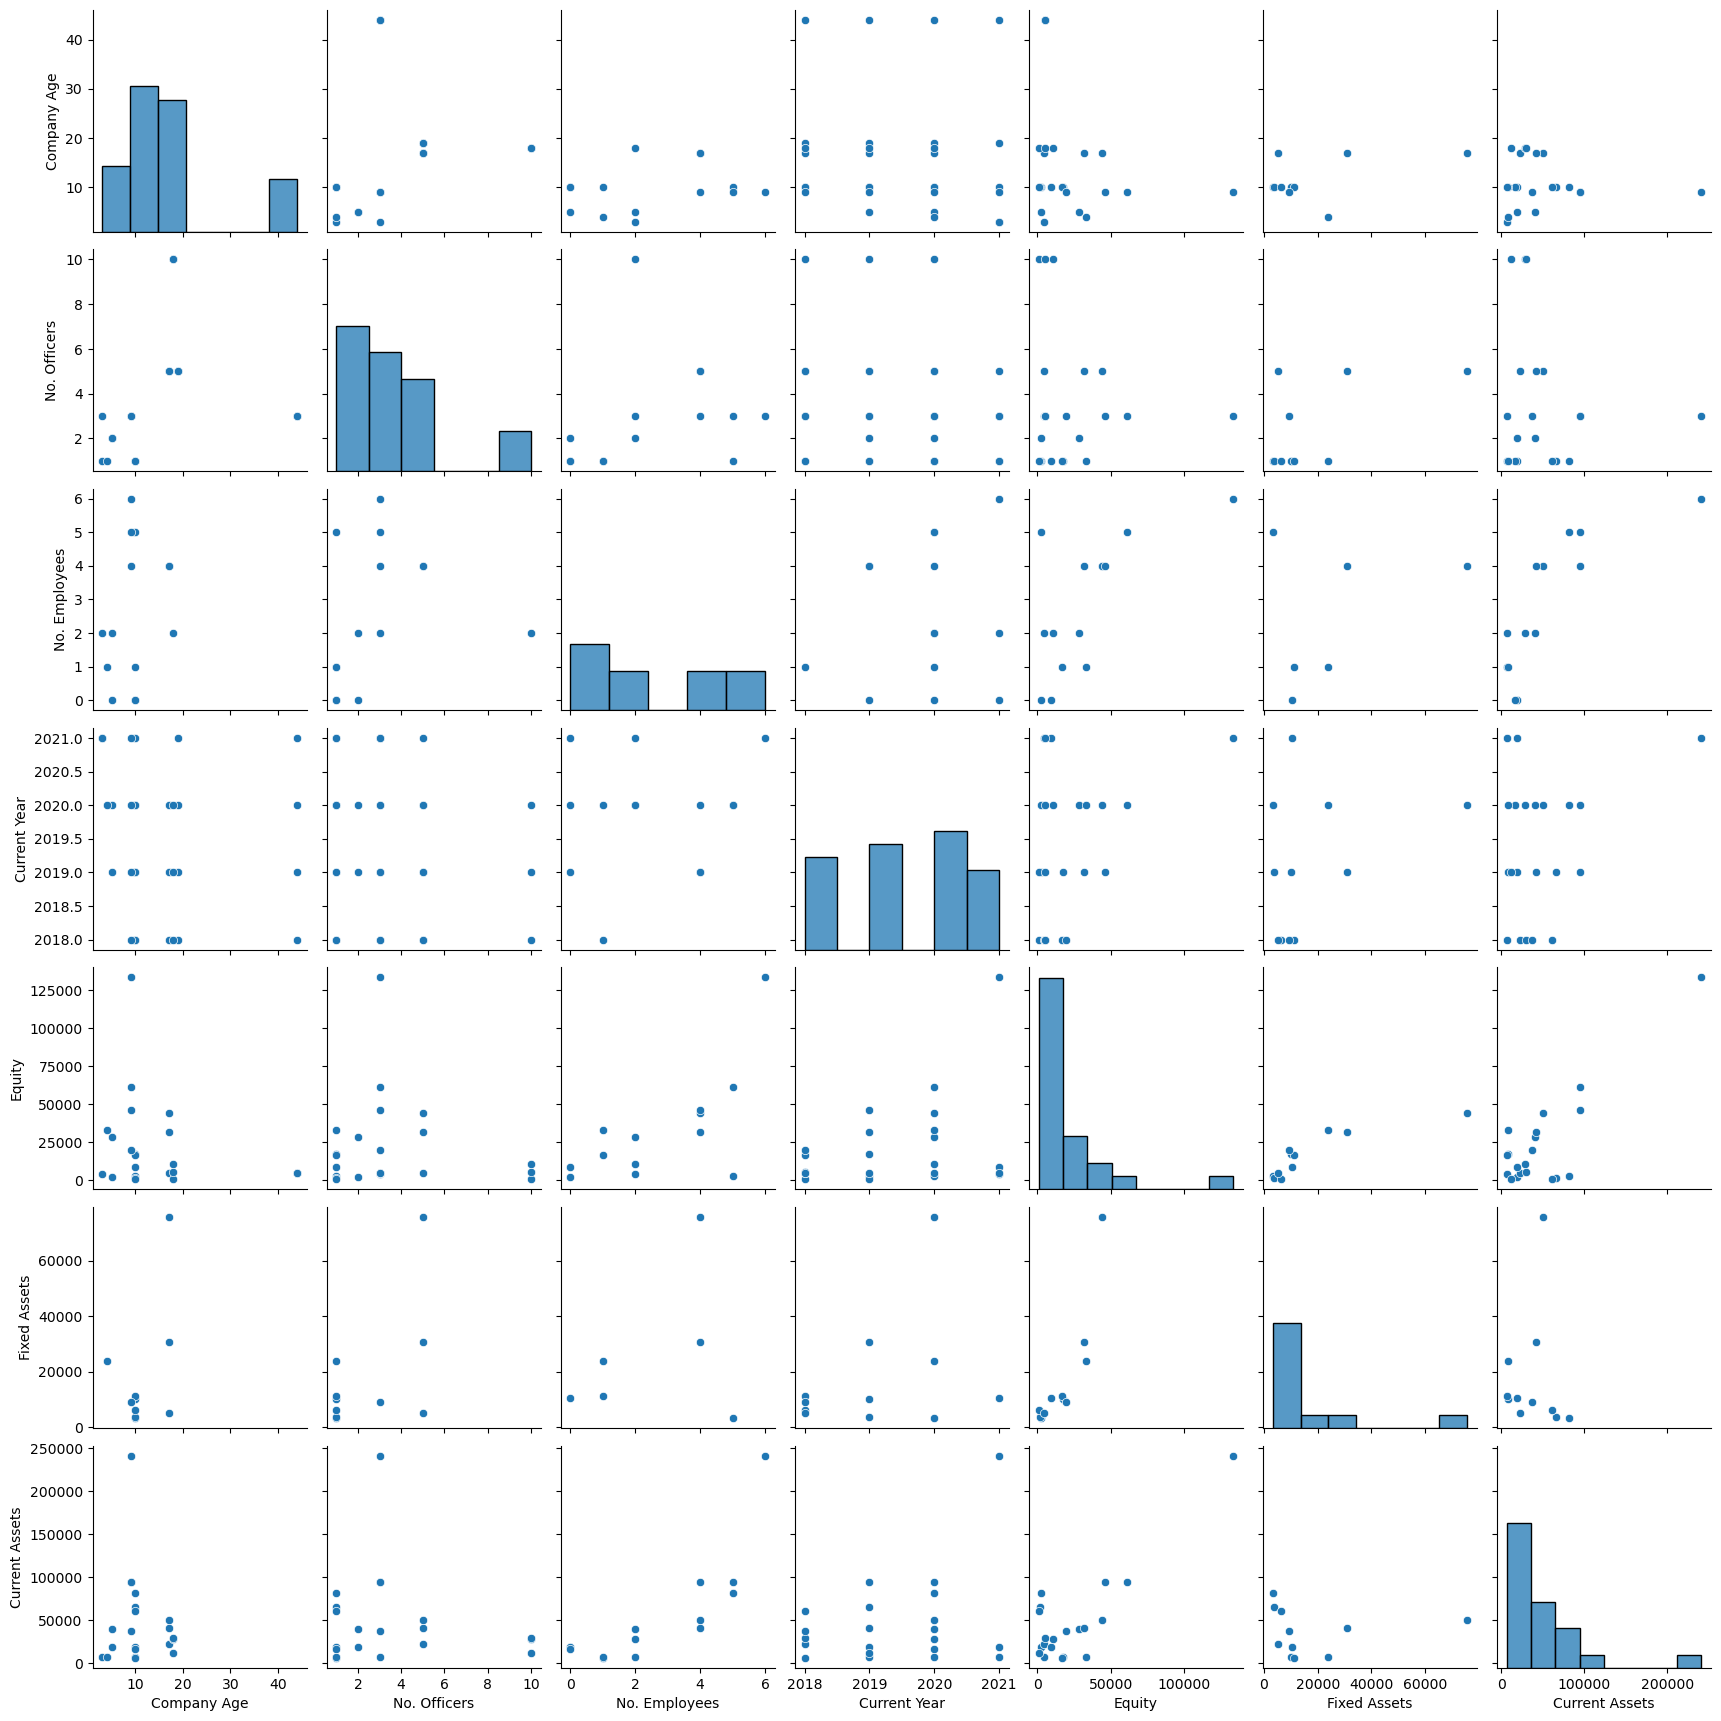

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.show()

**create a correlation matrix for the numeric columns in my dataset using seaborn**

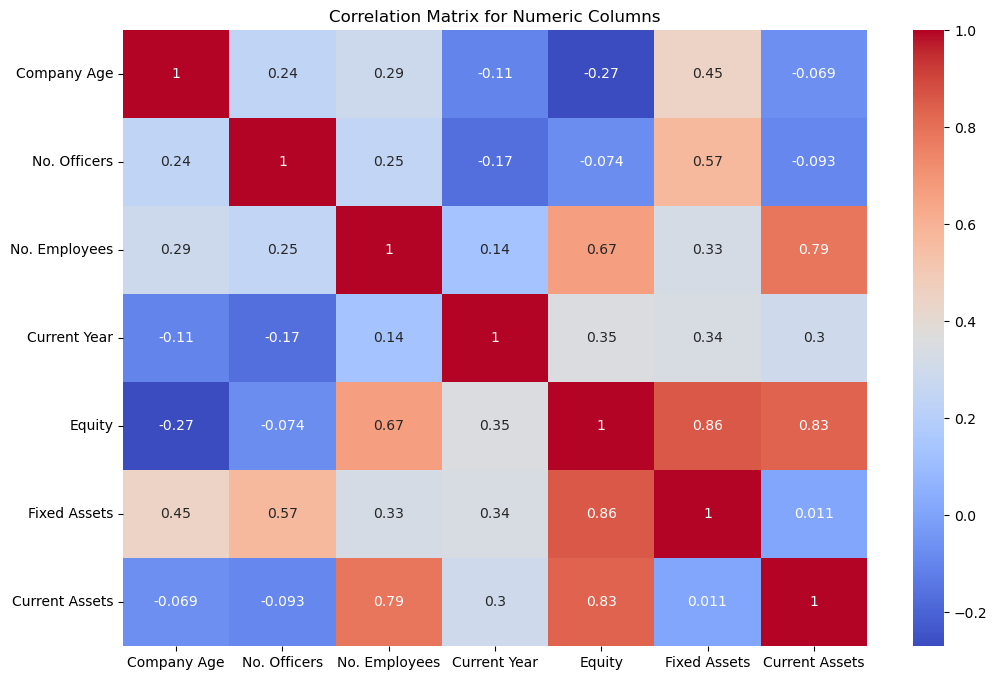

In [67]:
# Calculating the correlation matrix for the numeric columns
correlation_matrix = df[["Company Age", "No. Officers", "No. Employees", "Current Year", "Equity", "Fixed Assets", "Current Assets"]].corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Numeric Columns")
plt.show()

**I want to move on to bivariate analysis: Equity vs. Fixed Assets. Can you produce a scatter plot?**

Certainly! To visualize the relationship between Equity and Fixed Assets, we'll create a scatter plot. This plot will help us identify any patterns or correlations between these two variables.

Before creating the scatter plot, it's essential to note that the "Fixed Assets" column contains missing values. In this specific case, we'll simply exclude the rows with missing values for the plot.

Let's create the scatter plot for Equity vs. Fixed Assets:

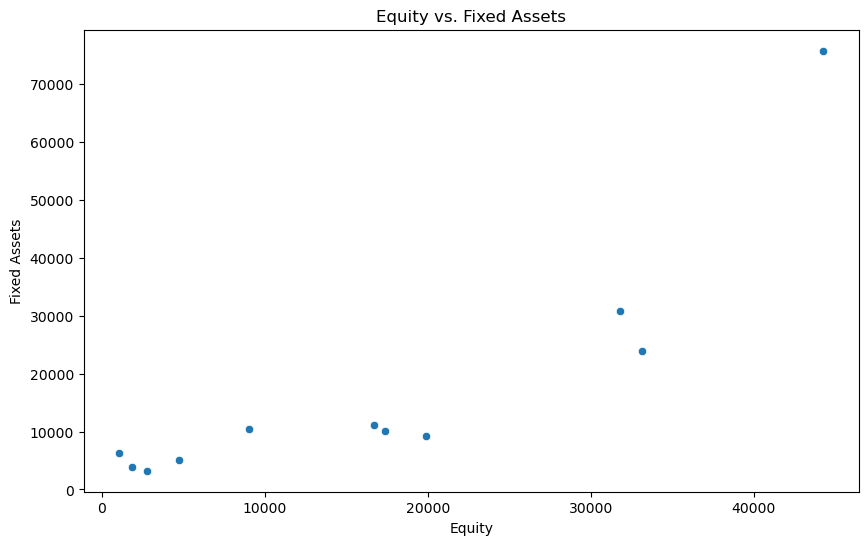

In [13]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removing rows with missing values in Fixed Assets for the scatter plot
scatter_data = df.dropna(subset=['Fixed Assets'])

# Creating the scatter plot for Equity vs. Fixed Assets
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Equity', y='Fixed Assets', data=scatter_data)
plt.title('Equity vs. Fixed Assets')
plt.xlabel('Equity')
plt.ylabel('Fixed Assets')
plt.show()

**Calculate the correlation for the scatter plot**

The Pearson correlation coefficient between Equity and Fixed Assets is approximately 0.8594. This value indicates a strong positive linear correlation between the two variables.

The strong correlation suggests that as the equity value increases, the value of fixed assets also tends to increase, and vice versa. 

**Can seaborn do a better scatter plot with a regression line?**

Yes, Seaborn provides an easy way to create scatter plots with a regression line to visualize the correlation between two variables. The sns.regplot function creates a scatter plot and fits a linear regression model to the data, displaying the resulting line.

Let's create a scatter plot for Equity vs. Fixed Assets with the regression line:

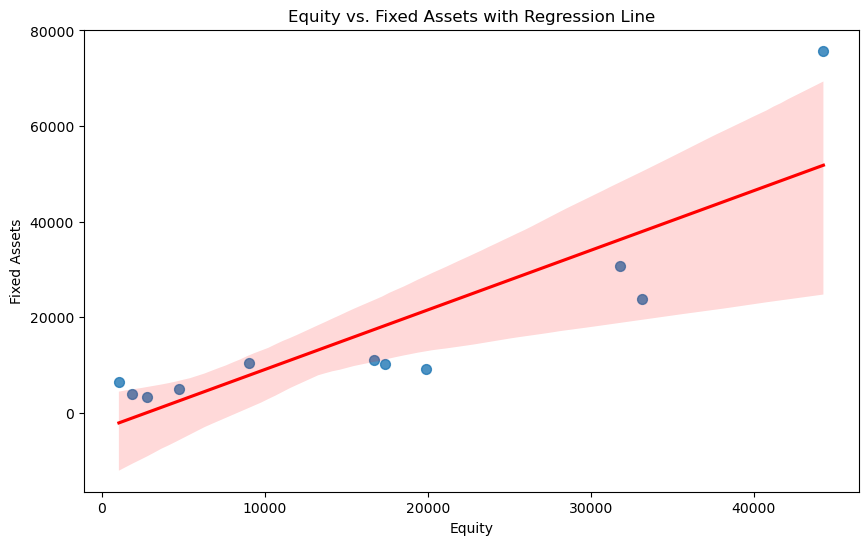

In [14]:
# Creating the scatter plot with regression line for Equity vs. Fixed Assets
plt.figure(figsize=(10, 6))
sns.regplot(x='Equity', y='Fixed Assets', data=scatter_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Equity vs. Fixed Assets with Regression Line')
plt.xlabel('Equity')
plt.ylabel('Fixed Assets')
plt.show()

The shaded area around the regression line in the plot represents the confidence interval for the regression estimate. It gives a visual indication of the uncertainty associated with the estimated linear relationship between the two variables.

Here's what it means in more detail:

Center Line: The solid line represents the best-fit linear regression line, which is the line that minimizes the sum of the squared differences (or "errors") between the observed values (dots) and the values predicted by the model (line).

Shaded Area: The shaded area around the line shows the confidence interval for the regression line. By default, this is typically a 95% confidence interval, meaning that we can be 95% confident that the true regression line lies within this shaded area. It provides a range of plausible values for the regression line, reflecting the uncertainty in estimating the population relationship from a sample of data.

The width of the confidence interval can vary along the line, depending on the distribution of the data points. If the data points are closely clustered around the line, the confidence interval will be narrower, indicating more certainty in the estimated relationship. Conversely, if the data points are more spread out, the confidence interval will be wider, reflecting more uncertainty.

*There are several possible theories to explain this relationship. Companies with higher equity might be more willing to invest in fixed assets like machinery or property. They could have growth in mind and are reinvesting their equity to increase production and fuel expansion.*

*In terms of further data collection and analysis it would be a good idea to check if this trend has held true over longer time frames, as this data only covers the past few years. It might also be useful to look into the most successful companies, or companies that have been around the longest, and see how they invest in differing economic conditions.*


**Create a scatter plot for Equity vs. Current Assets with a regression line**

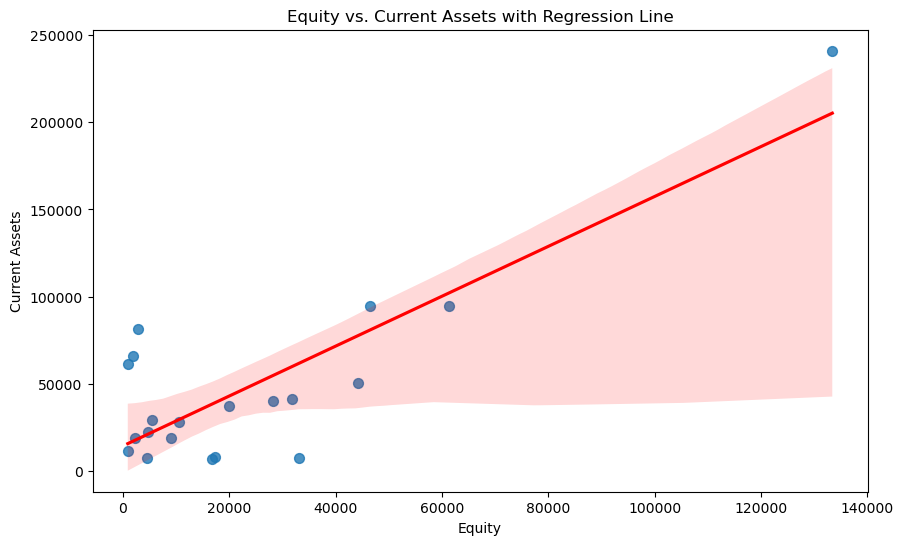

In [15]:
# Removing rows with missing values in Current Assets for the scatter plot
scatter_data_current_assets = df.dropna(subset=['Current Assets'])

# Creating the scatter plot with regression line for Equity vs. Current Assets
plt.figure(figsize=(10, 6))
sns.regplot(x='Equity', y='Current Assets', data=scatter_data_current_assets, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Equity vs. Current Assets with Regression Line')
plt.xlabel('Equity')
plt.ylabel('Current Assets')
plt.show()

Here's the scatter plot showing the relationship between Equity and Current Assets, along with a red regression line.

X-axis (Equity): Represents the equity value of the company for the given year.
Y-axis (Current Assets): Represents the value of current assets owned by the company, including assets likely to be converted into cash within a short period.
The regression line represents the best linear fit to the data and provides a visual indication of the correlation between these two variables.

**Caclculate the correlation**

The Pearson correlation coefficient between Equity and Current Assets is approximately 0.8420. This value indicates a strong positive linear correlation between the two variables.

This correlation suggests that companies in the musical instrument manufacturing industry with higher equity values also tend to have higher values of current assets. 

*The strong correlation shows that current assets increase as equity increases for businesses in the musical instrument industry. Inventory would be included in current assets, and it makes sense that as a company grows they need to have more current stock. Companies in the industry might also aim to maintain a proportionate level of liquidity to allow short-term flexibility. The expert I spoke to spends most of his time searching the internet for deals on vintage banjos and parts. When something desirable comes up for sale in his industry it tends to go quick, so he has to be ready to react with cash on hand.*



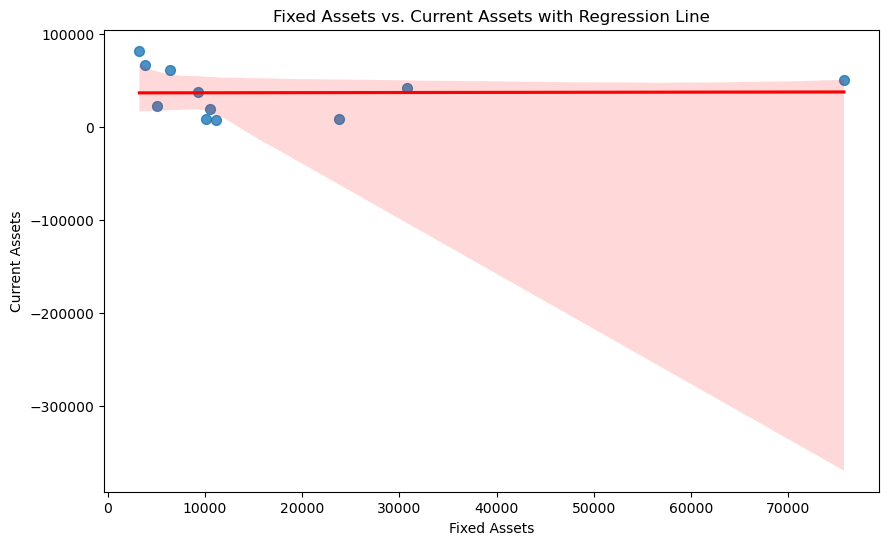

In [16]:
# Removing rows with missing values in Fixed Assets and Current Assets for the scatter plot
scatter_data_fixed_current_assets = df.dropna(subset=['Fixed Assets', 'Current Assets'])

# Creating the scatter plot with regression line for Fixed Assets vs. Current Assets
plt.figure(figsize=(10, 6))
sns.regplot(x='Fixed Assets', y='Current Assets', data=scatter_data_fixed_current_assets, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Fixed Assets vs. Current Assets with Regression Line')
plt.xlabel('Fixed Assets')
plt.ylabel('Current Assets')
plt.show()

**Calculate the correlation**

In [17]:
# Calculating the Pearson correlation coefficient between Fixed Assets and Current Assets
correlation_fixed_current_assets = scatter_data_fixed_current_assets['Fixed Assets'].corr(scatter_data_fixed_current_assets['Current Assets'])
correlation_fixed_current_assets

0.011149370348044592

The Pearson correlation coefficient between Fixed Assets and Current Assets is approximately 0.0111. This value indicates a very weak positive linear correlation between the two variables.

Such a low correlation suggests that there is little to no linear relationship between Fixed Assets and Current Assets within the companies in this dataset.

*When comparing fixed and current assets we see no relationship. THis is because 'Equity' is the confounding variable. When equity increases, so does both fixed assets and current assets. A rise in current assets is not driven by a rise in fixed assets and vice versa, so we don't see a pattern.*

**Build a multivariate regression model with equity, fixed assets, and current assets**

In [18]:
# Checking for missing values in the columns of interest
missing_values = df[['Equity', 'Fixed Assets', 'Current Assets']].isnull().sum()
missing_values

Equity             6
Fixed Assets      19
Current Assets     9
dtype: int64

In [19]:
import statsmodels.api as sm

# Removing rows with missing values in the columns of interest
regression_data = df[['Equity', 'Fixed Assets', 'Current Assets']].dropna()

# Defining the dependent variable (Y) and independent variables (X)
Y = regression_data['Equity']
X = regression_data[['Fixed Assets', 'Current Assets']]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the multivariate regression model
model = sm.OLS(Y, X).fit()

# Getting the summary of the regression model
model_summary = model.summary()
model_summary

C:\Users\Aidan\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Equity   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     21.36
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           0.000619
Time:                        13:45:08   Log-Likelihood:                -110.41
No. Observations:                  11   AIC:                             226.8
Df Residuals:                       8   BIC:                             228.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.295e+04   3853.081      3.360      0.010    4061.276    2.18e+04
Fixed Assets       0.5947      0.097      6.145      0.000       0.372       0.818
Current Assets    -0.1811      0.079     -2.294      0.051      -0.363       0.001
==============================================================================
Omnibus:                        2.131   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.015
Skew:                           0.337   Prob(JB):                        0.602
Kurtosis:                       1.673   Cond. No.                     9.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here's the summary of the multivariate regression model, where Equity is the dependent variable, and Fixed Assets and Current Assets are the independent variables:

Model Summary:

R-squared: 0.842 - This indicates that approximately 84.2% of the variation in Equity can be explained by Fixed Assets and Current Assets.

Adjusted R-squared: 0.803 - This is the R-squared value adjusted for the number of predictors in the model.

Coefficients:

Fixed Assets: 0.5947 (p < 0.001) - A positive coefficient indicates that as Fixed Assets increase, Equity tends to increase as well. This is statistically significant.

Current Assets: -0.1811 (p = 0.051) - A negative coefficient suggests an inverse relationship between Current Assets and Equity, though the p-value is just above the 0.05 significance level, indicating borderline statistical significance.

Interpretation and Insights:

Positive Relationship with Fixed Assets: The model confirms the strong positive relationship between Equity and Fixed Assets, as observed in the correlation analysis.

Inverse Relationship with Current Assets: The negative coefficient for Current Assets is interesting and may suggest a trade-off between maintaining short-term liquidity and ownership interest (Equity).

Considerations:

Small Sample Size: With only 11 observations in this analysis, the results should be interpreted with caution. The small sample size may limit the generalizability of the findings.

Potential Multicollinearity: The notes in the summary suggest that there might be strong multicollinearity or other numerical problems. This could be explored further using Variance Inflation Factor (VIF) or other diagnostic tools.

Recommendations for a Small Banjo Refurbishment Company:

Balanced Investment: Consider a balanced approach to investing in fixed and current assets, aligning with your long-term growth plans and short-term liquidity needs.

Monitor Industry Trends: Understanding how similar-sized companies or competitors in the industry balance equity, fixed assets, and current assets might provide valuable insights.

**Now plot the relationship between company age and equity to see if older companies tend to have higher equity.**

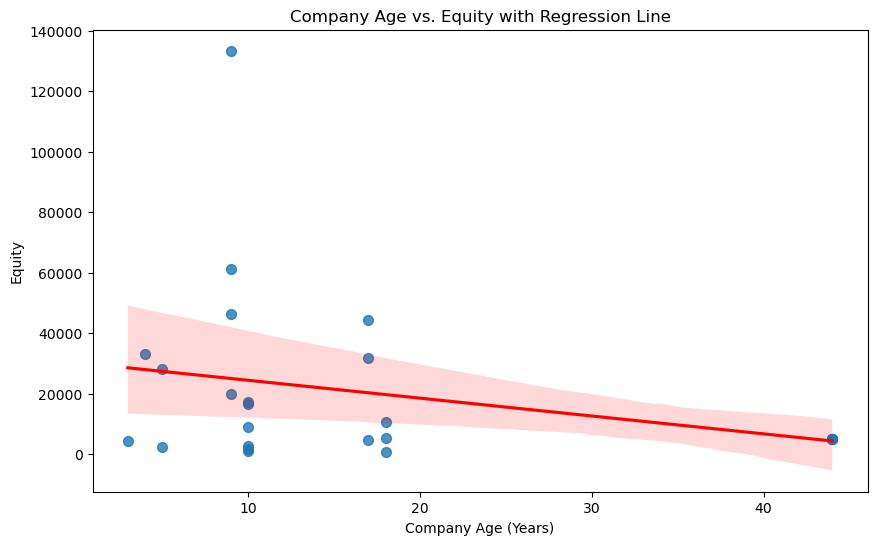

In [20]:
# Creating the scatter plot with regression line for Company Age vs. Equity using the new dataset
plt.figure(figsize=(10, 6))
sns.regplot(x='Company Age', y='Equity', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Company Age vs. Equity with Regression Line')
plt.xlabel('Company Age (Years)')
plt.ylabel('Equity')
plt.show()

**Calculate the correlation**

In [61]:
# Calculating the Pearson correlation coefficient between Company Age and Equity
correlation_company_age_equity = df['Company Age'].corr(df['Equity'])
correlation_company_age_equity

-0.26991959196047016

The Pearson correlation coefficient between Company Age and Equity is approximately −0.2334. This value indicates a weak negative linear correlation between the two variables.

Contrary to the visual appearance of the scatter plot, the numerical correlation suggests that older companies in the musical instrument manufacturing industry tend to have slightly lower equity values. It's worth noting that the correlation is weak, so this relationship is not strong and may be influenced by other factors.

*Looking at the raw data i think this relationship is being influenced by an outlier in the data - Wells Kennedy. It is by far the oldest company at 44 years, but the equity figures are suspicious as they're the same for every year: 5110. I'm going to remove this datapoint and calculate the correlation again.*

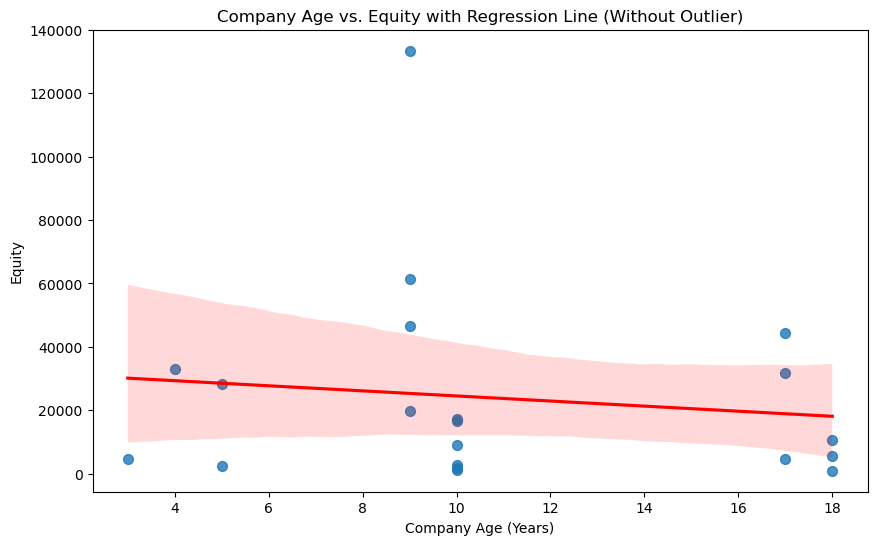

In [22]:
# Removing rows corresponding to "WELLS KENNEDY PARTNERSHIP LIMITED"
df_filtered = df[df['Company Name'] != 'WELLS KENNEDY PARTNERSHIP LIMITED']

# Creating the scatter plot with regression line for Company Age vs. Equity using the filtered dataset
plt.figure(figsize=(10, 6))
sns.regplot(x='Company Age', y='Equity', data=df_filtered, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Company Age vs. Equity with Regression Line (Without Outlier)')
plt.xlabel('Company Age (Years)')
plt.ylabel('Equity')
plt.show()

In [60]:
# Calculating the Pearson correlation coefficient between Company Age and Equity using the filtered dataset
correlation_company_age_equity_filtered = df_filtered['Company Age'].corr(df_filtered['Equity'])
correlation_company_age_equity_filtered

-0.12665589008686096

The Pearson correlation coefficient between Company Age and Equity, after removing the outlier "WELLS KENNEDY PARTNERSHIP LIMITED," is approximately −0.1267. This value indicates a weak negative linear correlation between the two variables.

This result is consistent with the previous calculation and still suggests a weak negative relationship between Company Age and Equity within the musical instrument manufacturing industry.

*This weak negative correlation does suggest that older companies in the musical instrument manufacturing industry tend to have slightly lower equity values which I was surprised by, but this is based on a very small NI dataset. Maybe older companies are focusing on a stable income as opposed to rapid growth. ANother possible reason could be the impact of technology - maybe older companies do a lot more manual handcrafting of instruments, whereas newer companies are making use of new machines to aid in manufacture.*

*Further data collection and analysis is necessary to understand this correlation. Ideally looking at balance sheets for some of the companies on this list could shed light on historical equity, debt, and other key financial metrics. Unfortunately this data isn't readily available.*

**Lets move on. Number of Officers vs. Number of Employees: Analyze the relationship between the number of officers and employees, and plot a graph with regression line.**

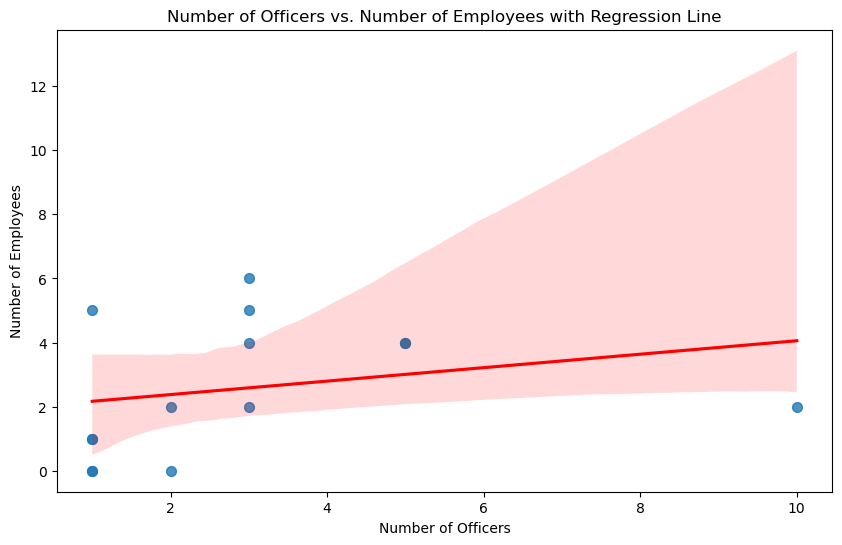

In [23]:
# Setting up the figure size
plt.figure(figsize=(10, 6))

# Using Seaborn's regplot to plot the scatter plot with a regression line
sns.regplot(x='No. Officers', y='No. Employees', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Setting the title and axis labels
plt.title('Number of Officers vs. Number of Employees with Regression Line')
plt.xlabel('Number of Officers')
plt.ylabel('Number of Employees')

# Displaying the plot
plt.show()

In [46]:
# Calculating the Pearson correlation coefficient between Number of Officers and Number of Employees
correlation_officers_employees = df['No. Officers'].corr(df['No. Employees'])
correlation_officers_employees

0.2505393724393913

*This value suggests a weak positive correlation. So when the number of officers increases, the number of employees tends to increase as well, but the relationship isn't particularly strong fot these companies.*

*It does look odd that some companies have more officers than employees. There could be a couple of explanations for this: all the companies in the dataset are relatively small, so the founders could be recorded as officers with no additional employees; or perhaps the previous resignations had to be subtracted from the number of officers in the original dataset.*

*In terms of further analysis, I would've liked to look at larger companies if time permitted to get a better view of this relationship between officers and employees. I could then compare this to figures from other industries to see how the musical instrument manufacturing industry differs. Employees in this industry are likely highly skilled and used to working on their own if we're talking about hand crafted instruments. It would be interesting to see if there's less management in companies that still produce hand crafted instruments compared with those who don't.*


**Create a scatter plot with regression line using seaborn to show the relationship between equity and number of employees in the attached dataset**

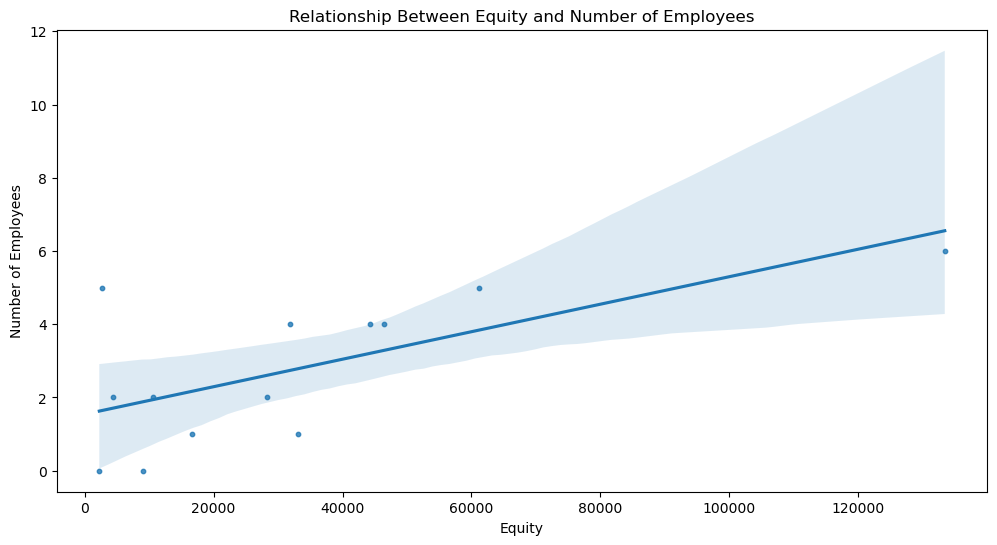

In [42]:
# Plotting the scatter plot with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='Equity', y='No. Employees', data=df, scatter_kws={'s': 10})
plt.title('Relationship Between Equity and Number of Employees')
plt.xlabel('Equity')
plt.ylabel('Number of Employees')
plt.show()

In [45]:
# Calculating the Pearson correlation coefficient between "Equity" and "No. Employees"
correlation = df['Equity'].corr(df['No. Employees'])
correlation

0.6917073221987691

*The correlation of 0.69 between equity and the number of employees in the dataset suggests a positive relationship between these two factors, meaning that as a company grows and expands it generally requires more employees to manage the increase in output.*

*If time permitted it would be interesting to calculate this relationship for a variety of industries to see if there are any where companies can grow substantially without increasing the number of employees in line with the growth. This would have clear implications for any business interested in growth, who could copy the businesses successful at accomplishing this.*

*For a small instrument refurbishment/manufacturing company, it's very unlikely this would be possible or even desirable. The value tends to be in excellent hand craftsmanship, as great handcrafted instruments are the most desirable to musicians. If my expert did have intentions to expand, it would be useful to look at what other companies are able to do to speed up the production of instruments without losing the 'handcrafted' label.*

## Using Pandas Profile Report

In [74]:
from ydata_profiling  import ProfileReport

In [75]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Trend Analysis

**Analyse the trend in equity over time using the 'Incorporated on' column.**

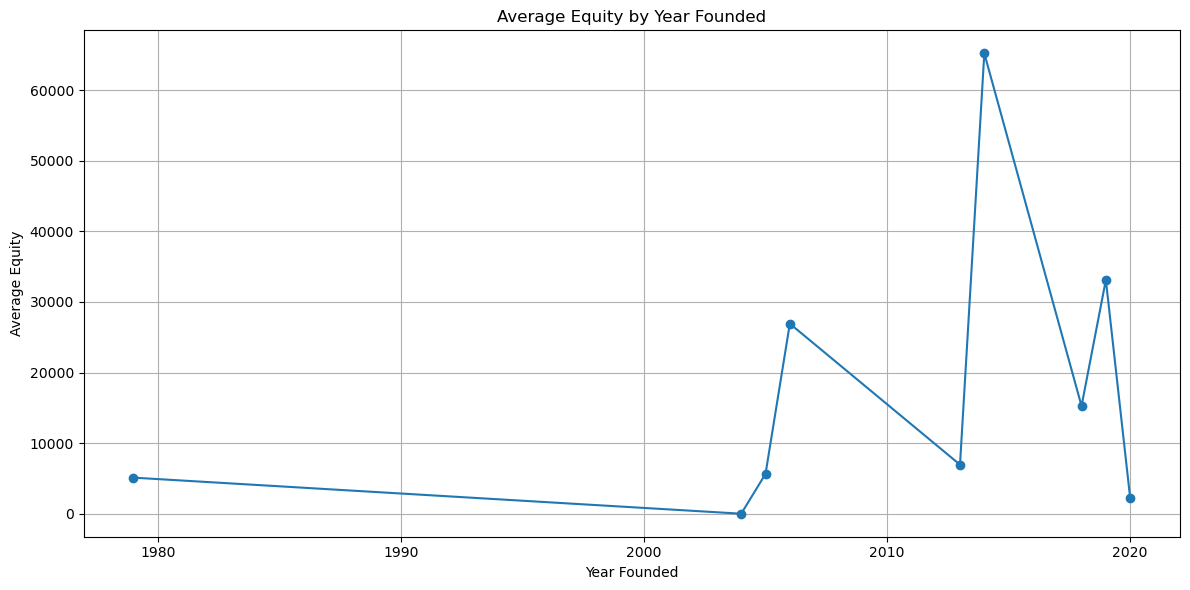

In [84]:
# Calculate 'Year Founded' by subtracting 'Company Age' from 2023
df['Year Founded'] = 2023 - df['Company Age']

# Creating a pivot table to calculate the average equity for each 'Year Founded'
pivot_table_year_founded = df.pivot_table(index='Year Founded', values='Equity', aggfunc='mean')

# Plotting the pivot table as a line graph
plt.figure(figsize=(12, 6))
plt.plot(pivot_table_year_founded, marker='o')
plt.title("Average Equity by Year Founded")
plt.xlabel("Year Founded")
plt.ylabel("Average Equity")
plt.grid(True)
plt.tight_layout()
plt.show()


*ChatGPT automatically created a pivot table to calculate the average equity for each year which I thought was quite impressive, as normally you would have to guide it through the various steps or provide the means for it.*

*I can't draw any real conclusions from this graph as the data points are so limited with only a few companies in Northern Ireland. If time and resources permitted I would've liked to gather more data on this and see if there was a trend for companies across the UK.*

## Comparing companies

**let's move on to this step: 5. Comparison Across Specific Companies**

We can create a pivot table that compares specific companies across various financial and organizational metrics. This can provide insights into how different companies stack up against each other in terms of equity, assets, number of employees, and other relevant metrics.

In [91]:
pivot_table_companies = df.pivot_table(index='Company Name', 
                                       values=['Company Age', 'No. Officers', 'No. Employees', 'Equity', 'Fixed Assets', 'Current Assets'], 
                                       aggfunc=['sum', 'mean'])


In [92]:
print(pivot_table_companies)


                                          sum                         \
                                  Company Age Current Assets  Equity   
Company Name                                                           
1TO1MUSIC LTD                              30       208763.0    5601   
ANDANTE PERCUSSION LTD                     76            0.0       4   
AVALON GUITARS LIMITED                     10        59604.0   30523   
CADY LIMITED                               51       114482.0   80786   
DEACCI LTD                                 40        50260.0   43035   
JJ CHEROKEE LIMITED                         3            1.0       1   
KITHARA GUITARS LIMITED                     3         7241.0    4465   
MCNALLY GUITARS LTD                         4         7778.0   33131   
MILLER WICKS (N.I.) LIMITED                54        69365.0   16930   
RUACH MUSIC LTD                            36       467694.0  260924   
WELLS KENNEDY PARTNERSHIP LIMITED         176            0.0   2

**What kind of graph can we display using the results of the pivot table?**

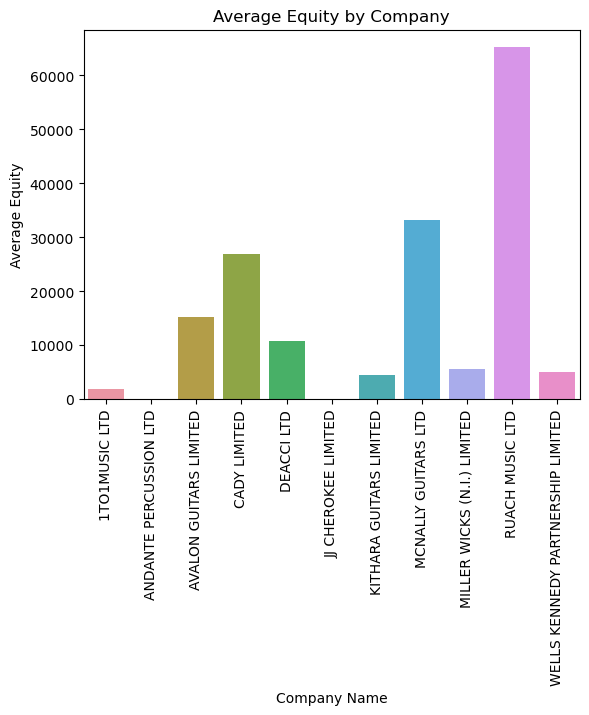

In [93]:
sns.barplot(x=pivot_table_companies.index, y=pivot_table_companies['mean']['Equity'])
plt.xticks(rotation=90)
plt.title('Average Equity by Company')
plt.xlabel('Company Name')
plt.ylabel('Average Equity')
plt.show()


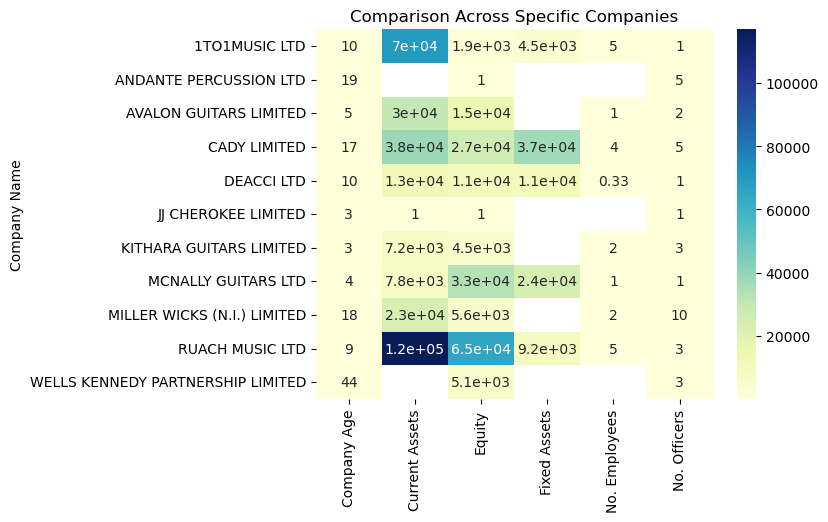

In [94]:
sns.heatmap(pivot_table_companies['mean'], annot=True, cmap='YlGnBu')
plt.title('Comparison Across Specific Companies')
plt.show()


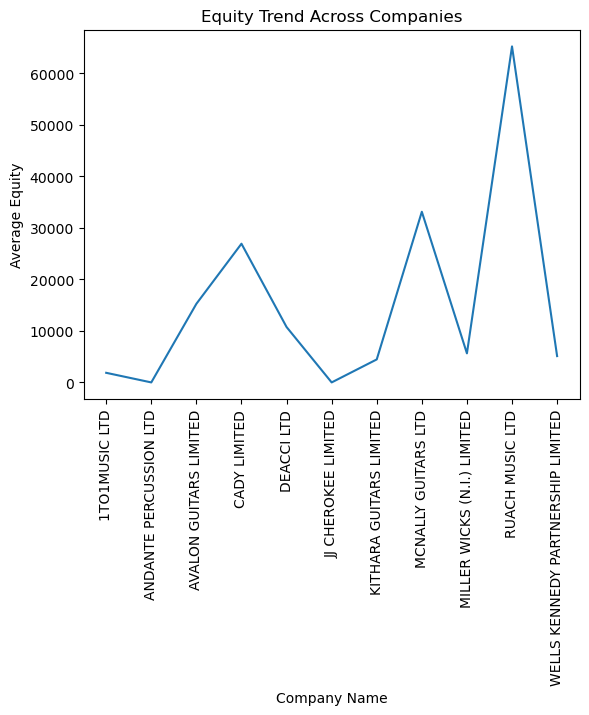

In [95]:
sns.lineplot(x=pivot_table_companies.index, y=pivot_table_companies['mean']['Equity'])
plt.xticks(rotation=90)
plt.title('Equity Trend Across Companies')
plt.xlabel('Company Name')
plt.ylabel('Average Equity')
plt.show()


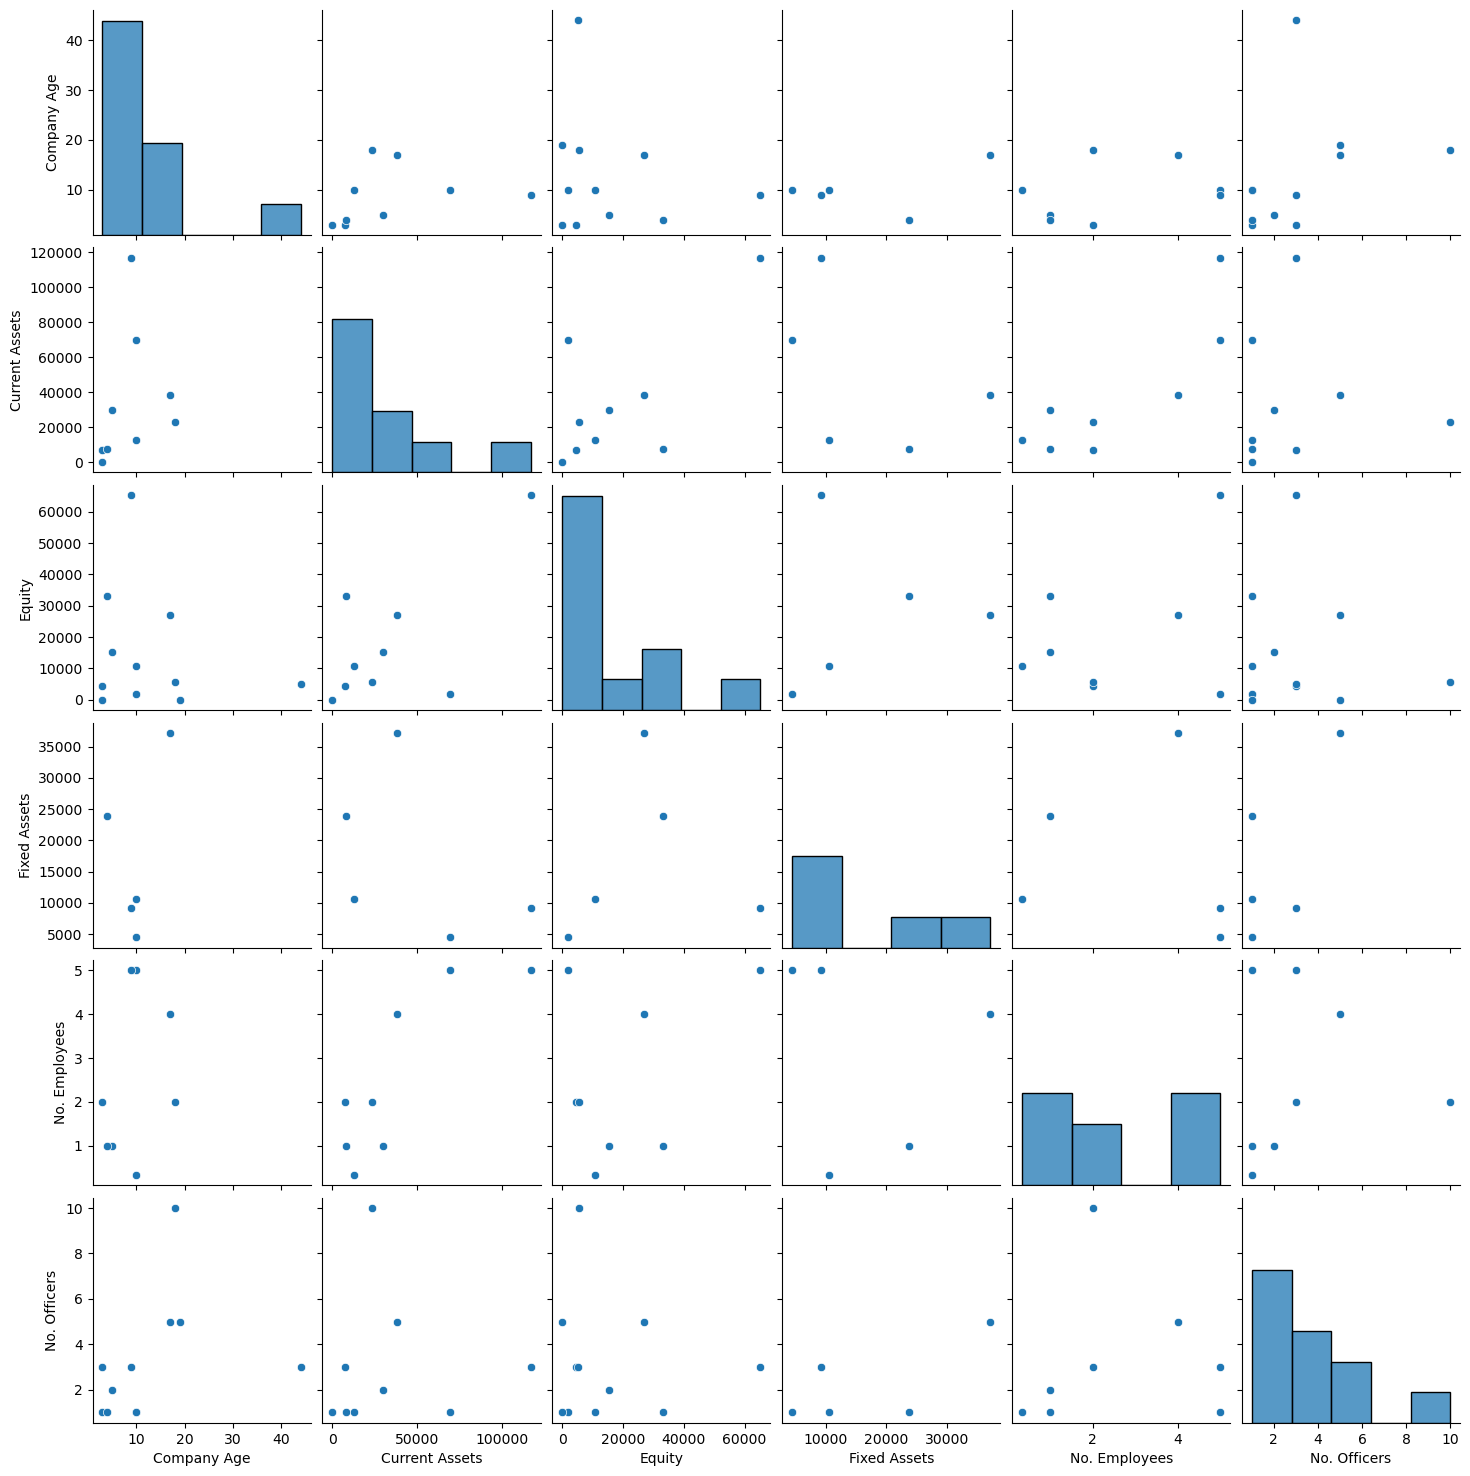

In [96]:
sns.pairplot(pivot_table_companies['mean'])
plt.show()


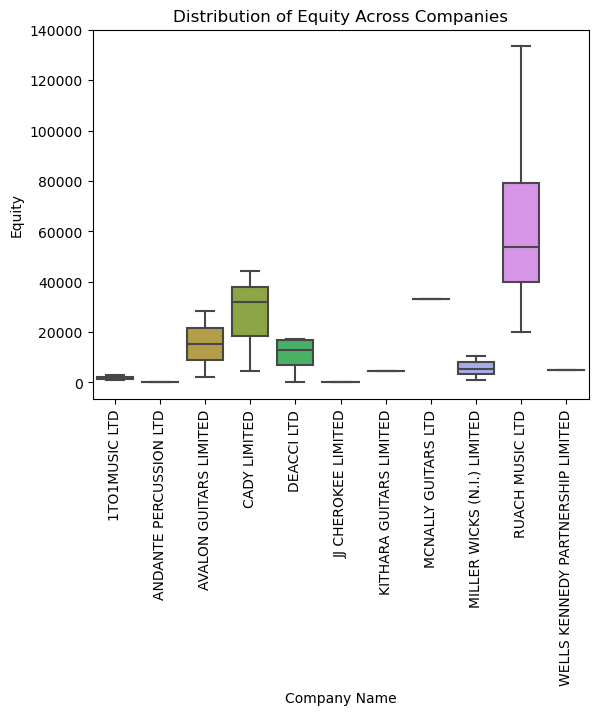

In [97]:
sns.boxplot(x='Company Name', y='Equity', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Equity Across Companies')
plt.show()


*It's clear from the visualisations above that there are big differences in equity of the companies in the dataset. One of the most surprising results is that the leader is Ruach Music. This is a company who don't produce musical instruments (other than cajons). They primarily produce pedalboards, guitar stands, and other accessories for musicians.*

*This high equity in an accessories company could indicate a strong demand for these products, possibly due to a broader market base. Compared with the number of instruments purchased over a lifetime, most musicians will purchase many times more accessories as they're needed more frequently.*

*Accessories might offer higher profit margins compared to instruments. Since they can be smaller, less complex, and cheaper to manufacture, the Ruach Music might have a more significant revenue stream from them. Pedalboards seem to be the product they're pushing the most on their website, which are much less intricate to build than an instrument and with less precision required.*

*When thinking about further data collection and analysis that could be performed, it could be revealing to segment UK wide companies into producers of instruments and producers of accesories or software to compare the financials.*
*There isn't enough data here to make any firm conclusions, but it would be interesting to collect more data from across the UK (or Europe / USA) to see if this relationship does indeed exist with producers of accessories having greater equity and revenue compared to producers of instruments. The profit margins of accessories vs instruments could be explored, and any available data on the units sold of particular accessories vs instruments.*

*My recommendations for my expert would include:*

*- Offering Accessories: Consider expanding the product line to include banjo accessories like strings, picks, straps, cases, etc., which may have higher turnover and profit margins. I know that my expert has a difficult time sourcing suitable instruments, so these accessories would certainly be easier for him to get his hands on.*

*- Offering bundles: These would likely be bundled the lower priced instruments in his stock aimed at beginners who may not have much in the way of accessories yet. A variety of products as mentioned in the previous point could be included with the purchase of a banjo.*

*- Copy the marketing strategy of a company such as Ruach Music: They have their pedalboards advertised front and centre, which they can likely produce themselves with a large profit margin. If you could find a similar accessory for banjo players that no other NI retailer offers, it could provide a profitable income stream if you're the go-to person for that accessory.*

*- Branding and diversification: There is a great opportunity for diversification here. Harley Davidson are a great example of a company who leveraged their strong reputation and brand to expand beyond their core product - motorcycles - into a diversified range of related products and merchandise. My expert seems to have a fantastic reputation in the traditional Irish music community for offering interesting, quality, refurbished vintage banjos that you can't get with a new instrument. I feel that this could be leveraged into developing a 'vintage' style brand possibly with 'vintage' inspired accessories. From my own experience with buying/selling guitar equipment, I know that anything vintage has become very popular in recent decades, to the point that guitarists will beat up their brand-new instruments to look older.*
